<a href="https://colab.research.google.com/github/Shota-8811396/output/blob/output/%E6%95%B0%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%91%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ロジスティック回帰の実装

scikit-learn(乳がんの診断結果のデータセットを使用)

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.2.2'

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
# データセットの読み込み
breast_cancer = load_breast_cancer()

In [ ]:
# 入力値と目標値の抽出
x = breast_cancer['data']
t = breast_cancer['target']

In [ ]:
# サイズの確認
x.shape

(569, 30)

In [ ]:
t.shape

(569,)

In [ ]:
# 0が悪性、1が良性
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
type(t)

numpy.ndarray

In [ ]:
type(x)

numpy.ndarray

In [ ]:
# 悪性の人数
(t == 0).sum()

212

In [ ]:
# 良性の人数
(t == 1).sum()

357

良性の人数の偏りが大きい

→不均衡データ（imblanced data）である

### 訓練データとテストデータに分割

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

In [ ]:
# 入力値のサイズを確認
x_train.shape, x_test.shape

((398, 30), (171, 30))

In [ ]:
# 目標値のサイズを確認
t_train.shape, t_test.shape

((398,), (171,))

### モデルの訓練とテスト

- LogisticRegression　←　改良されている
- SGDClassifier　←　こちらを用いる

**確率的勾配降下法（SGD: stochastic gradient descent）**

勾配降下法

$$
\begin{aligned}
{\bf w}^{(k+1)}
&= {\bf w}^{(k)} - \rho \dfrac{\partial}{\partial {\bf w}} L(
{\bf w}^{(k)}) \\
&= {\bf w}^{(k)} - \rho \sum_{n=1}^{N} \dfrac{\partial L_{n}}
{\partial {\bf w}}
\end{aligned}
$$

確率的勾配降下法

$$
{\bf w}^{(k+1)}
= {\bf w}^{(k)} - \rho \sum_{n=1}^{N_{b}} \dfrac{\partial L_{n}
}{\partial {\bf w}}
$$

ここで、 $N_{b}$ はバッチサイズと呼ぶ。

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# loss を log と指定するとロジスティック回帰と等価になる
#　乱数のシード random_state を固定しないと訓練の結果が毎回異なってしまう
clf = SGDClassifier(loss='log', random_state=0)
clf

SGDClassifier(loss='log', random_state=0)

In [ ]:
# モデルの訓練
clf.fit(x_train, t_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=0)

In [ ]:
# 訓練データに対する正解率（accuracy)の確認
clf.score(x_train, t_train)

0.6683417085427136

In [ ]:
# テストデータに対する正解率（accuracy)の確認
clf.score(x_test, t_test)

0.695906432748538

### データの前処理

標準化 : z-score narmalization

$$
\tilde{x} = \dfrac{x-\bar{x}}{\sigma}
$$

ここで、$\bar{x}$ は平均、 $\sigma$ は標準偏差

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 標準化に必要な分散と標準偏差を事前に算出
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
scaler.mean_

array([1.41855000e+01, 1.91928392e+01, 9.23355025e+01, 6.61859045e+02,
       9.64749497e-02, 1.04080000e-01, 8.87943058e-02, 4.94785528e-02,
       1.80698241e-01, 6.26464573e-02, 4.09096231e-01, 1.20445829e+00,
       2.86661859e+00, 4.13843643e+01, 6.98354020e-03, 2.50993719e-02,
       3.12257678e-02, 1.16784749e-02, 2.04023819e-02, 3.73508116e-03,
       1.63596206e+01, 2.55345226e+01, 1.07736030e+02, 8.94246985e+02,
       1.32529045e-01, 2.53368894e-01, 2.68530796e-01, 1.15221410e-01,
       2.89186935e-01, 8.37181407e-02])

In [ ]:
scaler.var_

array([1.29175157e+01, 1.75159661e+01, 6.11978383e+02, 1.34027359e+05,
       1.93172478e-04, 2.59765595e-03, 6.09266864e-03, 1.53406406e-03,
       7.85206454e-04, 4.69575214e-05, 8.61981370e-02, 3.03909148e-01,
       4.44058298e+00, 2.47685722e+03, 8.16640844e-06, 2.82690187e-04,
       8.14560621e-04, 3.42804953e-05, 6.67639347e-05, 6.93955438e-06,
       2.45909719e+01, 3.76963891e+01, 1.18455243e+03, 3.56531201e+05,
       5.27186175e-04, 2.35498499e-02, 3.72515370e-02, 4.30408790e-03,
       4.01445370e-03, 3.21651393e-04])

In [ ]:
# z-score normalization
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
x_train_norm.mean(axis=0)

array([-2.26033597e-15, -1.38917353e-16,  2.35657390e-15, -6.37680863e-16,
       -1.38219977e-15,  1.27393210e-16,  1.33129130e-15,  5.70035365e-16,
       -3.81436926e-15, -1.68081629e-15, -2.55239715e-16,  2.64445082e-16,
       -4.59989389e-16,  2.78950509e-17,  2.15684533e-15,  5.95140910e-16,
        4.56641983e-16,  3.30416878e-16, -1.38917353e-16,  1.17466059e-15,
        1.02346942e-15, -6.34333457e-16, -1.92699011e-15, -1.60675493e-16,
        3.58311928e-15, -8.60614623e-16, -2.94571737e-16, -6.33217655e-17,
       -5.45069294e-16,  3.86883434e-15])

In [ ]:
x_train_norm.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# 前処理後のデータで訓練
clf = SGDClassifier(loss='log', random_state=0)
clf.fit(x_train_norm, t_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=0)

In [ ]:
# 訓練データに対して正解率（accuracy）を確認
clf.score(x_train_norm, t_train)

0.9698492462311558

In [ ]:
# テストデータに対して正解率（accuracy）を確認
clf.score(x_test_norm, t_test)

0.9590643274853801

### パラメータの最適化

学習係数（learning rate）

In [ ]:
# GridSearchCV クラスのインポート
from sklearn.model_selection import GridSearchCV

In [ ]:
# 探索するハイパーパラメータの範囲を定義
param_grid = [{
    'loss': ['log'],
    'learning_rate': ['constant'],
    'eta0': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'random_state': [0]
}]

In [ ]:
# GridSearchCV クラスを用いたモデルの定義
clf_cv = GridSearchCV(estimator=SGDClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
clf_cv

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid=[{'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'learning_rate': ['constant'], 'loss': ['log'],
                          'random_state': [0]}],
             scoring='accuracy')

In [ ]:
# 定義したハイパーパラメータの組み合わせでモデル訓練
clf_cv.fit(x_train_norm, t_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid=[{'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'learning_rate': ['constant'], 'loss': ['log'],
                          'random_state': [0]}],
             scoring='accuracy')

In [ ]:
# 候補の中で最も正解率が高かった値
clf_cv.best_score_

0.9799367088607596

In [ ]:
# 正解率が最も高かったハイパーパラメータの組み合わせ
clf_cv.best_params_

{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log', 'random_state': 0}

In [ ]:
# 最も正解率が高かった訓練済みモデルを抽出
clf_best = clf_cv.best_estimator_
clf_best

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log', random_state=0)

In [ ]:
# 訓練データに対する正解率
clf_best.score(x_train_norm, t_train)

0.9874371859296482

In [ ]:
# テストデータ
clf_best.score(x_test_norm, t_test)

0.9766081871345029

### 評価指数

-　正解率

-　Precision

-　Recall

-　.....

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# 混同行列
y_test = clf_best.predict(x_test_norm)
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# 混同行列の算出
cmat = confusion_matrix(t_test, y_test)
cmat

array([[ 60,   3],
       [  1, 107]])

In [ ]:
import seaborn as sns

<Axes: >

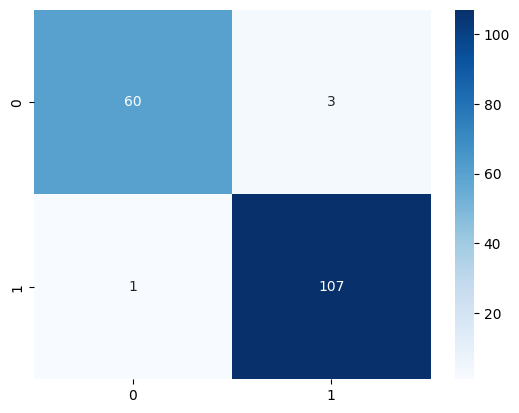

In [ ]:
sns.heatmap(cmat, annot=True, fmt='', cmap='Blues')

In [ ]:
import numpy as np

<Axes: >

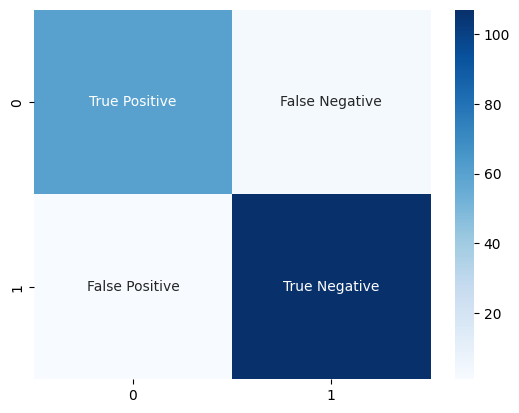

In [ ]:
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cmat, annot=labels, fmt='', cmap='Blues')